In [ ]:
from notebook.services.config import ConfigManager
cm = ConfigManager()

In [ ]:
cm.update('livereveal', {
              'width': 1000,
              'height': 600,
              'scroll': True,
})

In [ ]:
!jt -t solarizedd

In [ ]:
!jt -r

In [ ]:
!jt -l

In [59]:
from IPython.display import Image

In [2]:
pwd!

'/Users/Doukas/Desktop'






##                    FIFA fever




##                    a statistical analysis on soccer players



# source: https://www.kaggle.com/karangadiya/fifa19
# data points: > 30k
# columns: > 83

                                                                

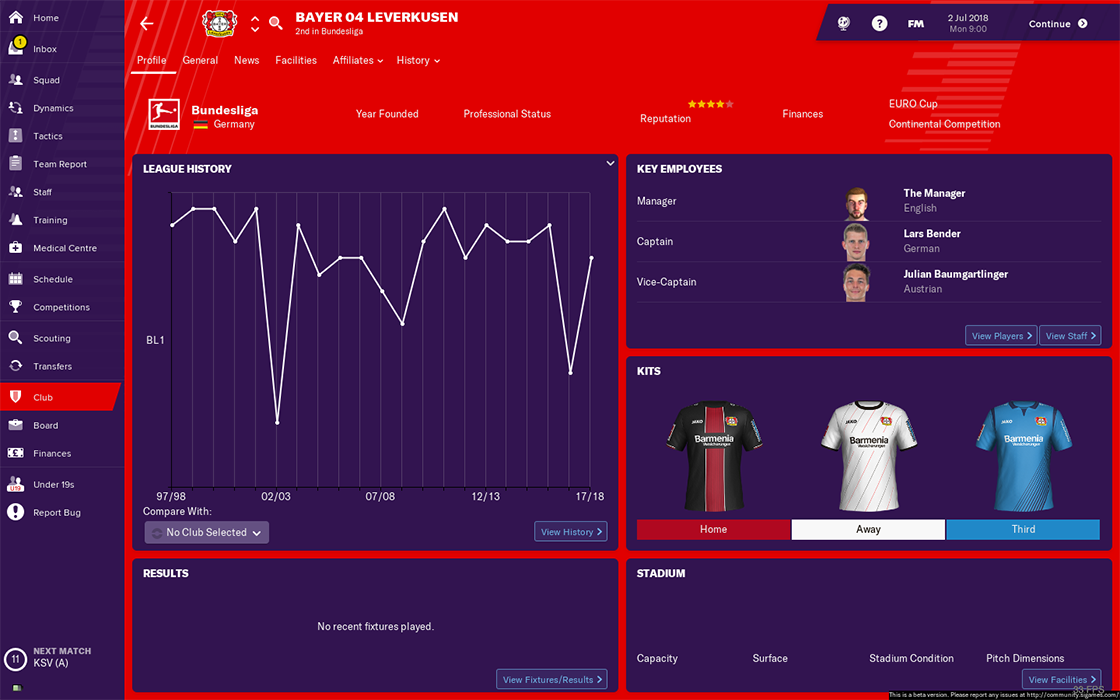

In [63]:
Image(filename="/Users/Doukas/Desktop/fm.png",width=1000, height=200)

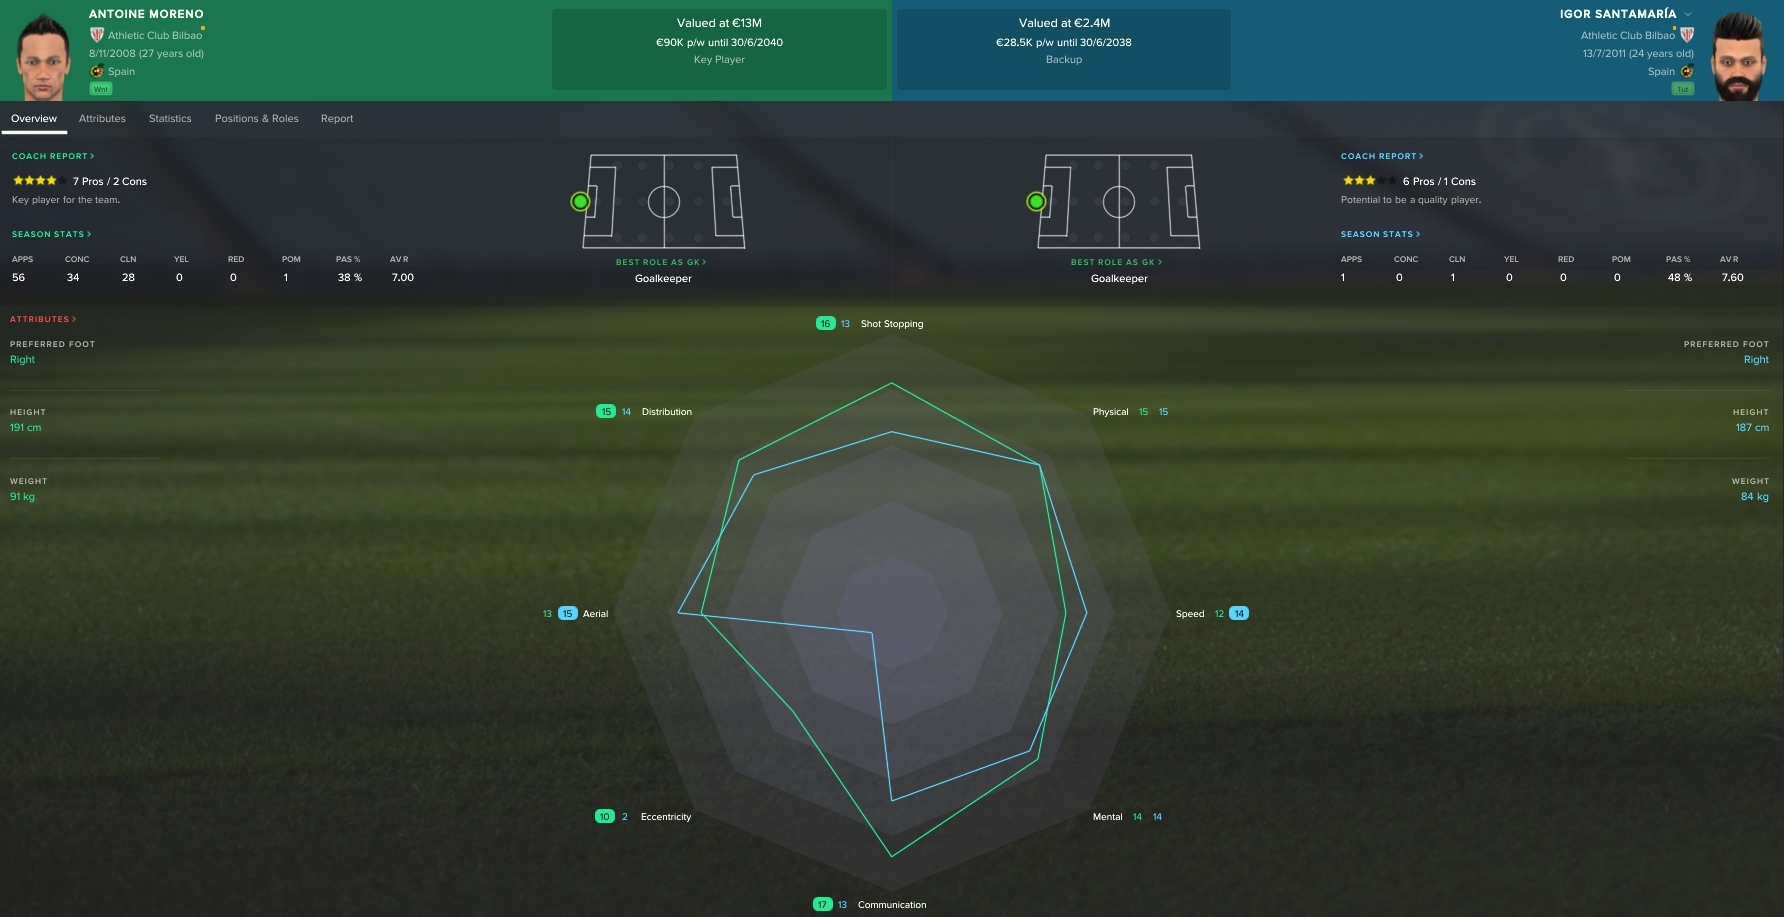

In [65]:
Image(filename="/Users/Doukas/Desktop/fmspider.png",width=1000, height=200)

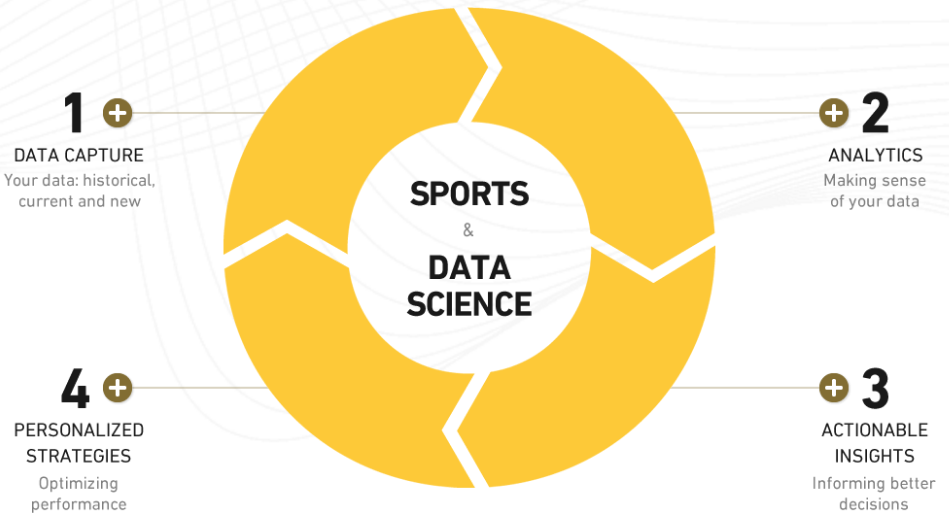

In [66]:
Image(filename="/Users/Doukas/Desktop/Sports & Data Science Orreco.png",width=1000, height=200)

In [14]:
import requests
import pandas as pd
from pprint import pprint
import random
import re
import scrapy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline
sns.set()
from collections import Counter as counter
import seaborn as sns
from IPython.display import display, HTML
from math import pi

In [3]:
fifa = pd.read_csv("fifa_19.csv") #encoding = 'iso8859_15') 

In [4]:
fifa.drop(['Photo', 'Flag', 'Club Logo', 'Unnamed: 0', 'Loaned From', 'Contract Valid Until'], axis = 1, inplace = True)

In [4]:
fifa.head(3)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M


In [5]:
def value_to_int(fifa_value):
    try:
        value = float(fifa_value[1:-1])
        suffix = fifa_value[-1:]

        if suffix == 'M':
            value = value * 1000000
        elif suffix == 'K':
            value = value * 1000
    except ValueError:
        value = 0
    return value

fifa['Value'] = fifa['Value'].apply(value_to_int)
fifa['Wage'] = fifa['Wage'].apply(value_to_int)

##                    Forming a top team

In [6]:
top_team = fifa.iloc[fifa.groupby(fifa['Position'])['Overall'].idxmax()][['Name', 'Position','Nationality','Age','Value']]
top_team

,Name,Position,Nationality,Age,Value
17,A. Griezmann,CAM,France,27,78000000.0
12,D. Godín,CB,Uruguay,32,44000000.0
20,Sergio Busquets,CDM,Spain,29,51500000.0
271,Luis Alberto,CF,Spain,25,28500000.0
67,Thiago,CM,Spain,27,45500000.0
3,De Gea,GK,Spain,27,72000000.0
28,J. Rodríguez,LAM,Colombia,26,69500000.0
35,Marcelo,LB,Brazil,30,43000000.0
24,G. Chiellini,LCB,Italy,33,27000000.0
11,T. Kroos,LCM,Germany,28,76500000.0


In [7]:
fifa.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Rele

In [8]:
# top_team['Value'].sum()

In [9]:
('Total number of countries : {0}'.format(fifa['Nationality'].nunique()))
print(fifa['Nationality'].value_counts().head(6))

England      1662
Germany      1198
Spain        1072
Argentina     937
France        914
Brazil        827
Name: Nationality, dtype: int64


In [10]:
print('Total number of clubs : {0}'.format(fifa['Club'].nunique()))
print(fifa['Club'].value_counts().head(6))

Total number of clubs : 651
Southampton         33
AS Monaco           33
Everton             33
Real Madrid         33
Atlético Madrid     33
Newcastle United    33
Name: Club, dtype: int64


In [11]:
print('Maximum Potential : '+str(fifa.loc[fifa['Potential'].idxmax()][1]))
print('Maximum Overall Perforamnce : '+str(fifa.loc[fifa['Overall'].idxmax()][1]))

Maximum Potential : K. Mbappé
Maximum Overall Perforamnce : L. Messi


In [12]:
atr_cols=['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
i=0
while i < len(atr_cols):
    print('Best {0} : {1}'.format(atr_cols[i],fifa.loc[fifa[atr_cols[i]].idxmax()][1]))
    i += 1

Best Crossing : K. De Bruyne
Best Finishing : L. Messi
Best HeadingAccuracy : Naldo
Best ShortPassing : L. Modrić
Best Volleys : E. Cavani
Best Dribbling : L. Messi
Best Curve : Quaresma
Best FKAccuracy : L. Messi
Best LongPassing : T. Kroos
Best BallControl : L. Messi
Best Acceleration : Douglas Costa
Best SprintSpeed : K. Mbappé
Best Agility : Neymar Jr
Best Reactions : Cristiano Ronaldo
Best Balance : Bernard
Best ShotPower : Cristiano Ronaldo
Best Jumping : Cristiano Ronaldo
Best Stamina : N. Kanté
Best Strength : A. Akinfenwa
Best LongShots : L. Messi
Best Aggression : B. Pearson
Best Interceptions : N. Kanté
Best Positioning : Cristiano Ronaldo
Best Vision : L. Messi
Best Penalties : M. Balotelli
Best Composure : L. Messi
Best Marking : A. Barzagli
Best StandingTackle : G. Chiellini
Best SlidingTackle : Sergio Ramos
Best GKDiving : De Gea
Best GKHandling : J. Oblak
Best GKKicking : M. Neuer
Best GKPositioning : G. Buffon
Best GKReflexes : De Gea


In [13]:
print("The shape: ", fifa.shape)

print("The size: ", fifa.size)

The shape:  (18207, 83)
The size:  1511181


In [14]:
fifa.head(3)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M


In [15]:
fifa[fifa.Nationality == 'Spain'].head(3)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,2201,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
13,168542,David Silva,32,Spain,90,90,Manchester City,60000000.0,285000.0,2115,...,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,€111M


In [17]:
filtering_data = fifa.Nationality == "Germany"
filtering_data2 = fifa.Age < 25
filtering_data3 = fifa.Overall > 75
best_Germany=(fifa[filtering_data & filtering_data2 & filtering_data3].sort_values(by = 'Overall' , ascending = False))[['Name','Age','Club','Nationality']]
best_Germany.set_index('Name',inplace=True)
best_Germany

,Age,Club,Nationality
Name,,,
L. Sané,22,Manchester City,Germany
J. Kimmich,23,FC Bayern München,Germany
N. Süle,22,FC Bayern München,Germany
J. Tah,22,Bayer 04 Leverkusen,Germany
T. Werner,22,RB Leipzig,Germany
L. Goretzka,23,FC Bayern München,Germany
S. Gnabry,22,FC Bayern München,Germany
J. Draxler,24,Paris Saint-Germain,Germany
J. Brandt,22,Bayer 04 Leverkusen,Germany


In [18]:
fifa.at[26,'Name']

'M. Salah'

Text(0.5, 1.0, 'Count of players on the position')

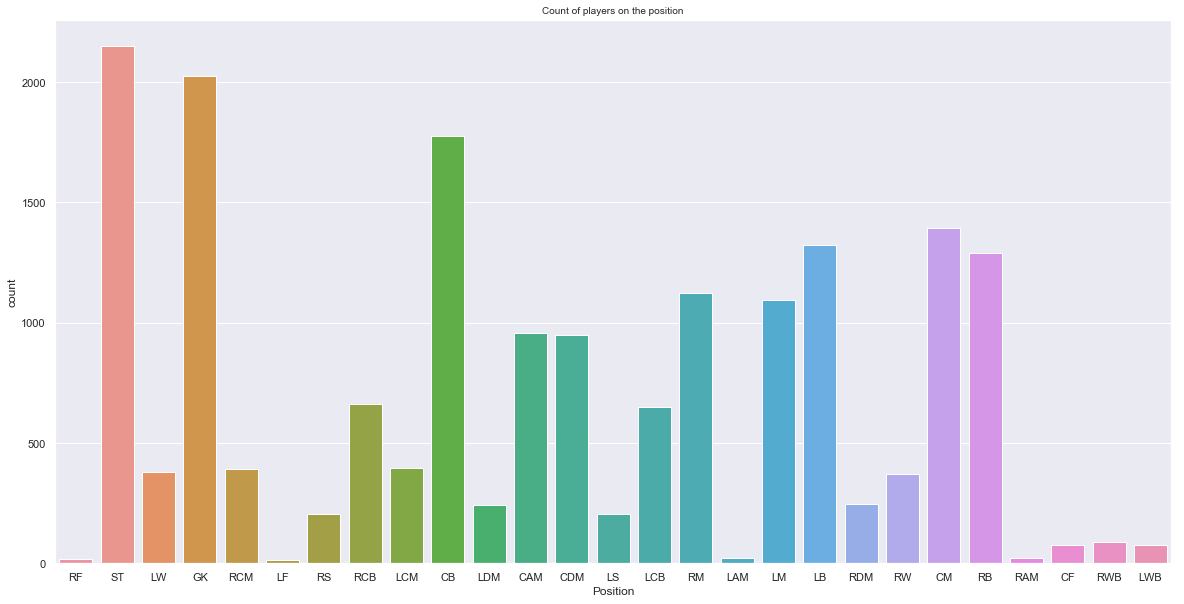

In [36]:
sns.set(style="darkgrid")
plt.figure(figsize = (20,10))
ax = sns.countplot(x = 'Position' ,data = fifa) 
# countplot is use for showing the counts of observations in each categorical bin using bars.
ax.set_title(label='Count of players on the position', fontsize=10)


In [40]:
labels=np.array(['Acceleration', 'Agility', 'Balance', 'BallControl', 'Dribbling',])
stats=fifa.loc[65,labels].values

In [56]:
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

# Creating radar charts

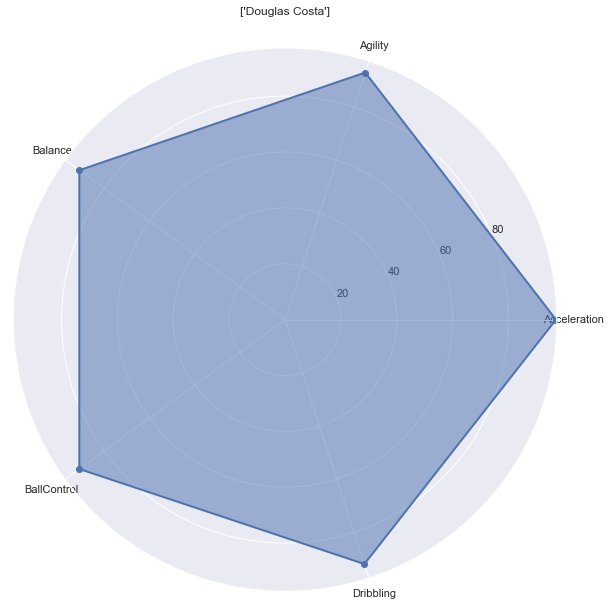

In [54]:
import matplotlib.pyplot as plt
from math import pi
import matplotlib.pyplot as plt

fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.5)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title([fifa.loc[65,"Name"]])
ax.grid(True)


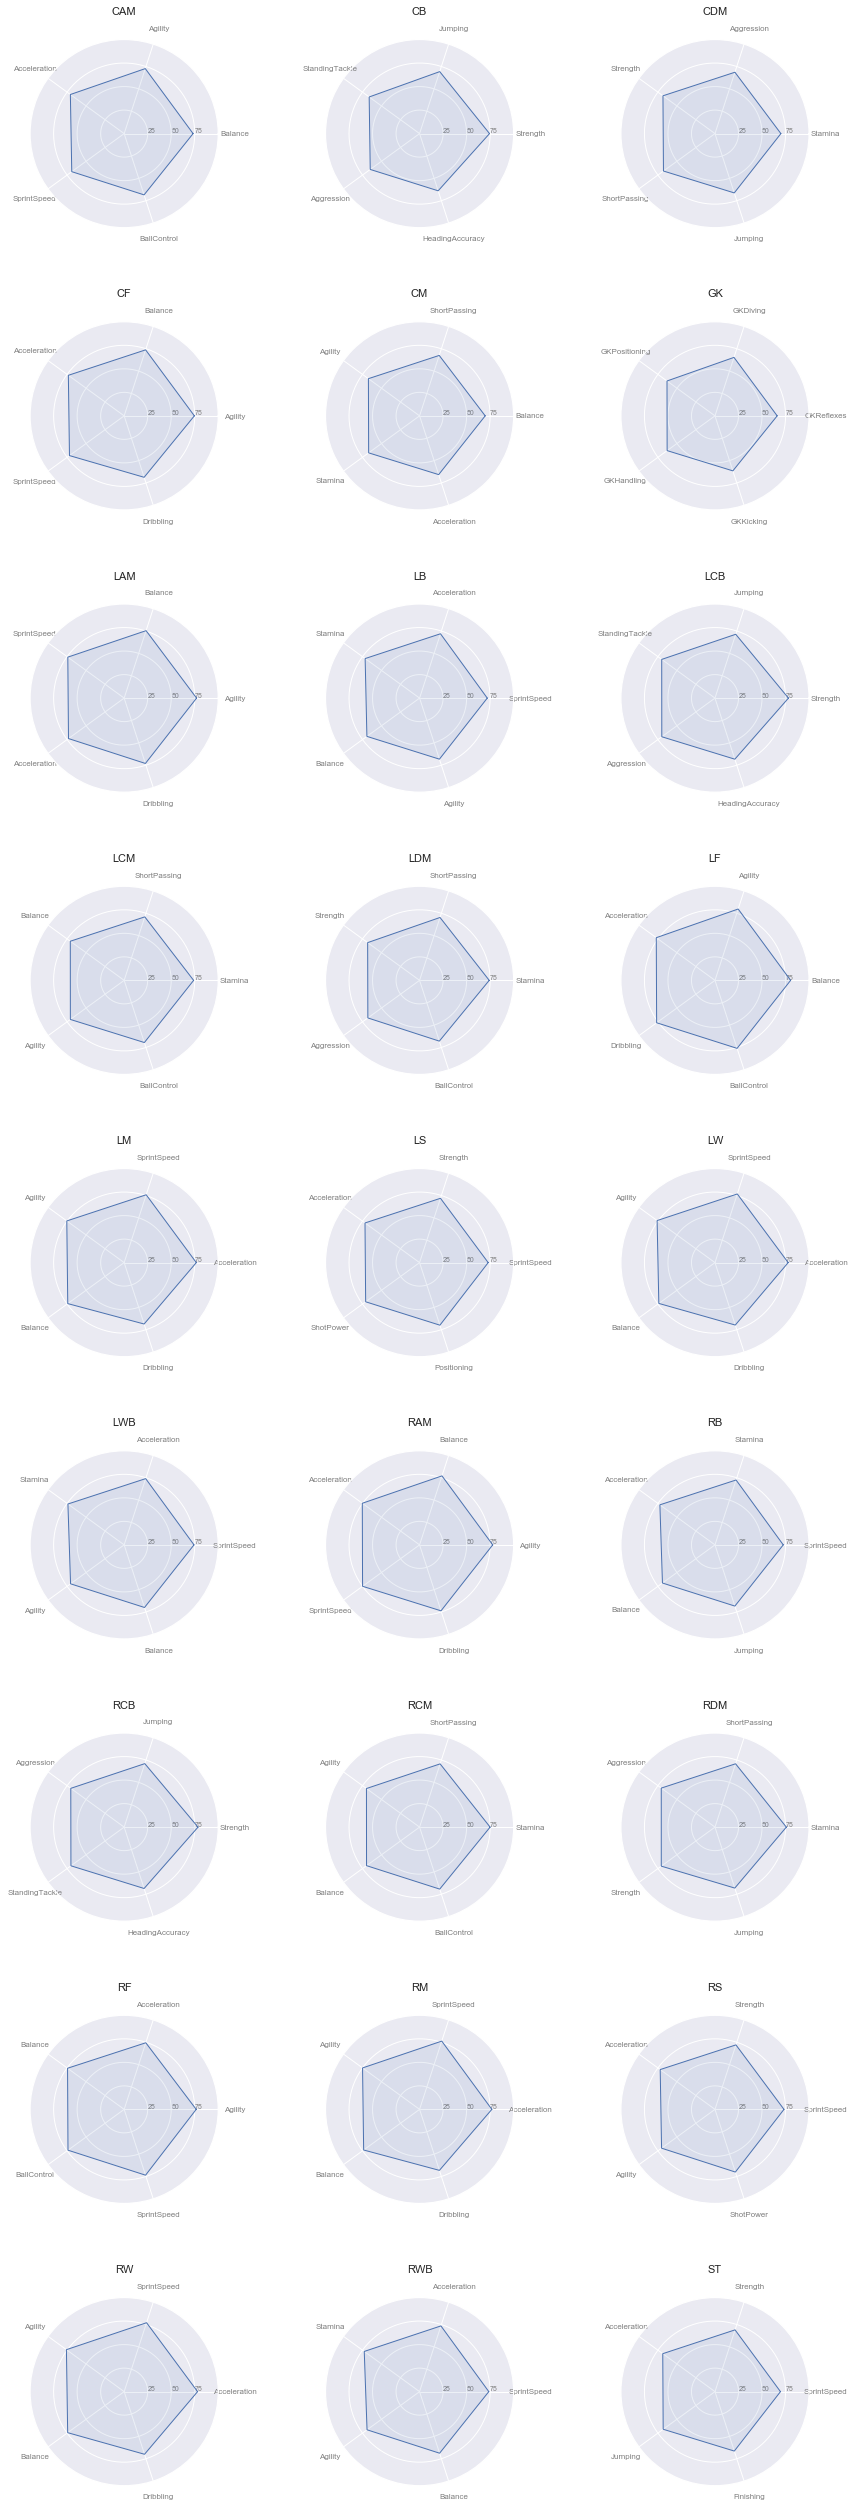

In [15]:
idx = 1
plt.figure(figsize=(15,45))
for position_name, features in fifa.groupby(fifa['Position'])[atr_cols].mean().iterrows():
    top_features = dict(features.nlargest(5))
    
    # number of variable
    categories=top_features.keys()
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = list(top_features.values())
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(9, 3, idx, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
    plt.ylim(0,100)
    
    plt.subplots_adjust(hspace = 0.5)
    
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    
    plt.title(position_name, size=11, y=1.1)
    
    idx += 1 

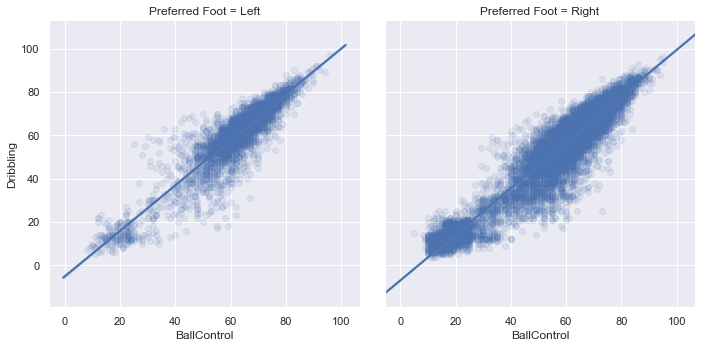

In [23]:
sns.lmplot(x = 'BallControl', y = 'Dribbling', data = fifa,
          scatter_kws = {'alpha':0.1},
          col = 'Preferred Foot');

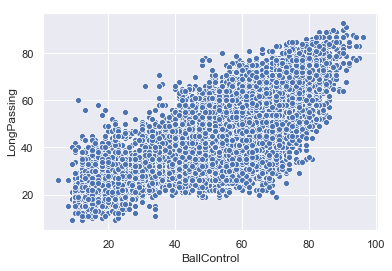

In [29]:
sns.scatterplot(x='BallControl', y="LongPassing", data=fifa2)

In [34]:
fifa2 = fifa.sort_values(by='Age', axis = 0)

In [33]:
fifa2['BallControl'].corr(fifa2["LongPassing"])

0.7886500392604525

In [18]:
c = fifa.corr()

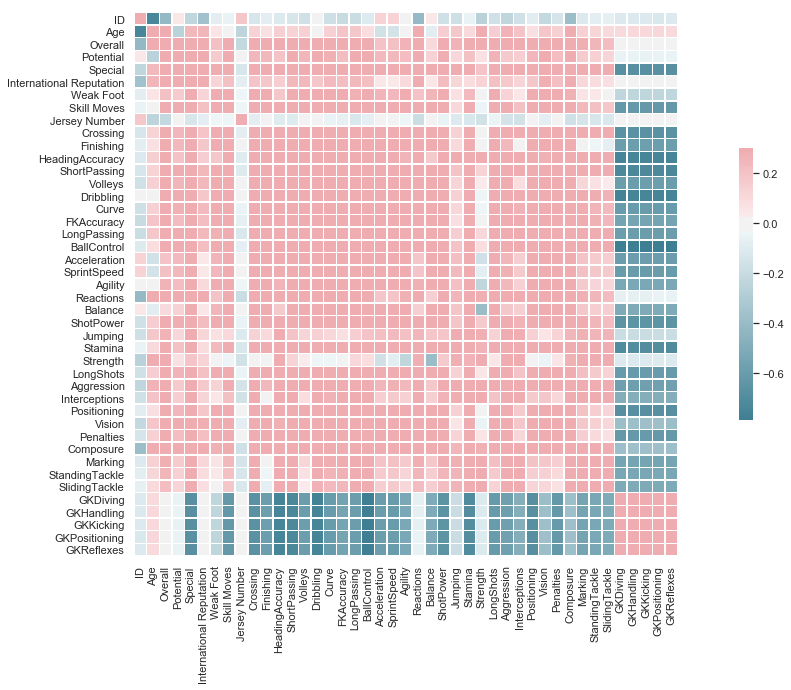

In [20]:
plt.rcParams['figure.figsize']=(22,10)
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(c, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

#sns.palplot(sns.color_palette("PuBu", 10))

In [31]:
fifa.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Rele

Text(0.5, 1.0, 'Heatmap')

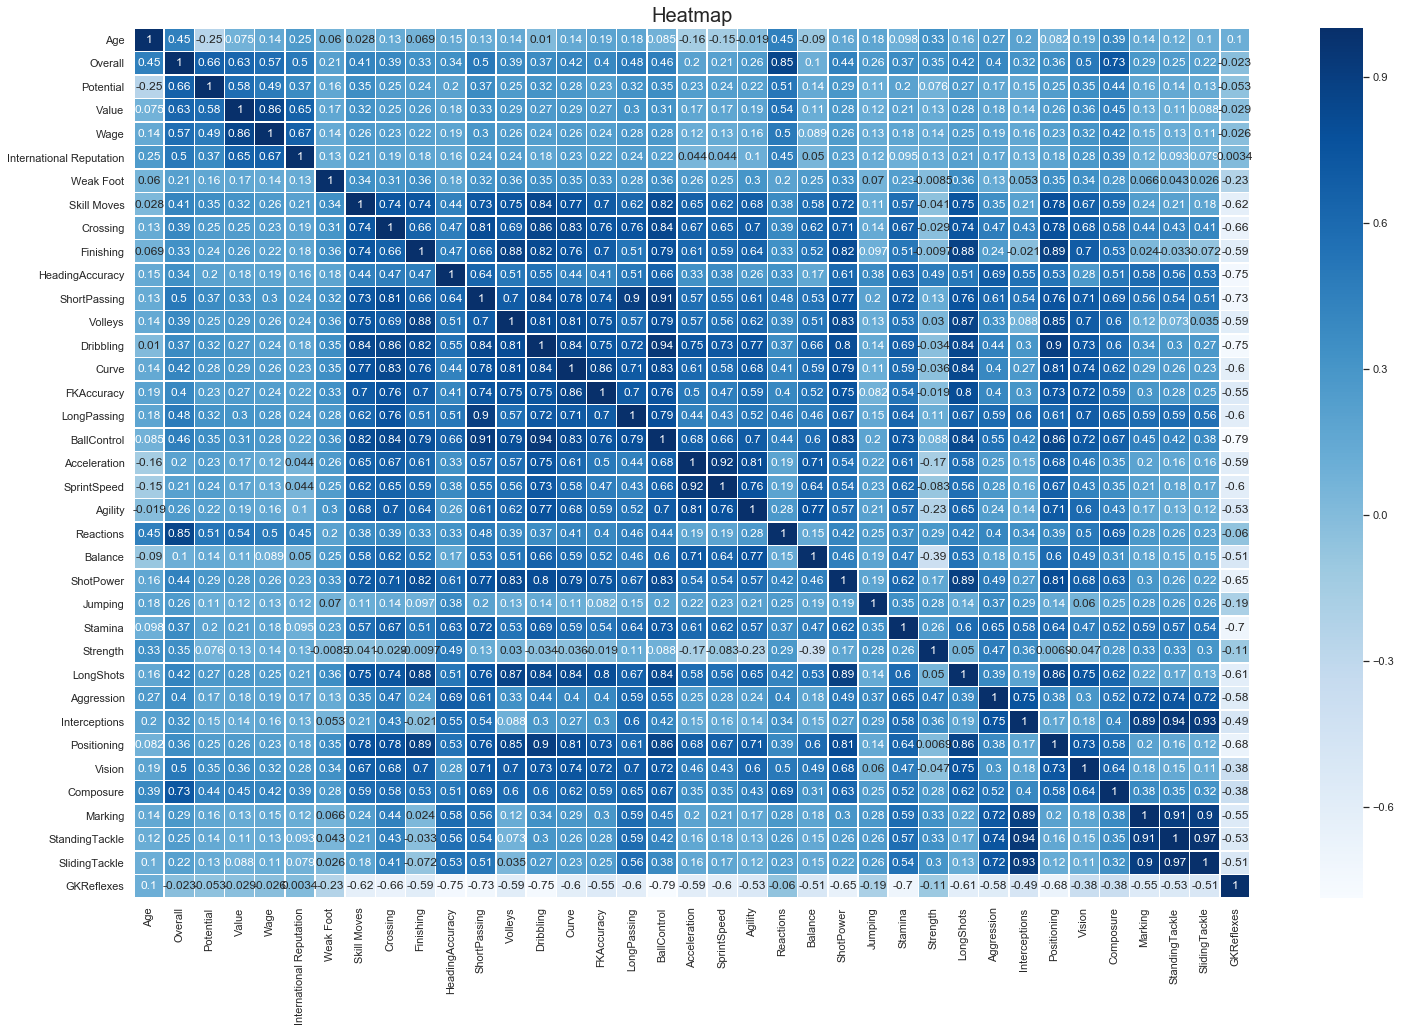

In [32]:
plt.rcParams['figure.figsize']=(25,16)
# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
fifacorr = sns.heatmap(fifa[['Age','Overall', 'Potential',
       'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position',
       'Height', 'Weight','Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle','GKReflexes']].corr(), annot = True, linewidths=.5, cmap='Blues')
fifacorr.set_title(label='Heatmap', fontsize=20)



# Thank you